# Machine Learning (laboratory instruction)
## Linear regression (part 2)

### Task 1. Function $f$.
**Step 1:** Write a function: $f(x) = (x - 50)^2 + 1$.

**Step 2:** Calculate the output `y` for `x = 1...100`.

**Step 3:** Display the function in chart (`plt.plot()`).

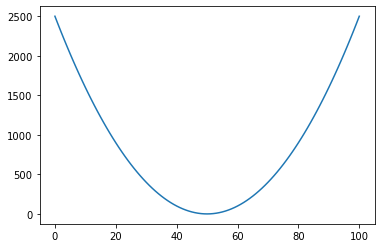

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 101)
y = []
def fun(x):
    return (x-50)**2 + 1
for i in range(len(x)):
    y.append(fun(x[i]))
plt.plot(x, y)

### Task 2. Derivative.

The derivative of a function is a tangent line to the function at s chosen input value. It can be treated as a linear approximation of the function at the mentioned input value. In other words, the derivative $f'$ is a slope of the tangent line to function $f$.

The derivatives can be calculated using the below formulas (`a` is some constant, `x` is variable):
<table>
  <tr>
    <th width="150px">Function</th>
    <th width="150px">Derivative</th>
  </tr>
<tr>
    <td>$a$          </td>
    <td>$0$          </td>
</tr>
<tr>
    <td>$ax$         </td>
    <td>$a$          </td>
</tr>
<tr>
    <td>$ax^n$       </td>
    <td>$nax^{n-1}$  </td>
</tr>
<tr>
    <td>$e^x$        </td>
    <td>$e^x$        </td>
</tr>
<tr>
    <td>$ln(x)$      </td>
    <td>$\frac{1}{x}$</td>
</tr>
<tr>
    <td>$\sin(x)$     </td>
    <td>$\cos(x)$     </td>
</tr>
<tr>
    <td>$\cos(x)$     </td>
    <td>$-\sin(x)$    </td>
</tr>
<tr>
    <td>$f(x)+g(x)$  </td>
    <td>$f'(x)+g'(x)$</td>
</tr>
<tr>
    <td>$f(x)-g(x)$  </td>
    <td>$f'(x)-g'(x)$</td>
</tr>
<tr>
    <td>$af(x)$      </td>
    <td>$af'(x)$     </td>
</tr>
</table>

**Example:**
To calculate the derivative of function $f = 5x^2 + 10x -2$ with respect to $x$, following operations should be done:
$$f'(x) = \frac{d}{dx}5x^2 + 10x -2$$
(applying rule $a \rightarrow 0$, and $ax^n \rightarrow nax^{n-1}$)

[//]: # (
$$f'(x) = \frac{d}{dx}(2*5)x^{2-1} + 10x^{1-1} -2$$
)

$$f'(x) = 10x + 10$$

<u>Chain rule:</u>

The chain rule is a formula to compute the derivative of a composite function:
$$f'(g(x)) = f'(g(x))g'(x)$$

**Example:**
$$y = \cos(x^2)$$
$$g(x) = x^2$$
$$g'(x) = 2x$$
$$f(x) = \cos(g(x))$$
$$f'(x) = -\sin(g(x))$$
$$y' = -\sin(g(x))2x = -2x\sin(x^2)$$

**Task:** Calculate (manually) the derivative of the function $f(x) = (x - 50)^2 + 1$ (from previous task). Make sure you include all the steps of calculation in comment. Write a python function that implements the derivative.

*NOTE: You can calculate on paper and attach the photo (or scan) as additional file.*


In [2]:
y = (x-50)**2 + 1 
# y = x^2 - 100x + 2501
def fun(x):
    return (x-50)**2 + 1
def derv(x):
    return 2*x-100
der_x = np.linspace(50, 70, 20)
der_y = derv(60) * der_x
der_y -= der_y[10] - fun(60)

### Task 3. Plot the derivative.
Plot the function $f$ and the tangent line to the graph of this function. The slope of the tangent line is equal to the derivative $f'$. See the example output presented below:

**Expected output** (tangent line at point $x=60$):

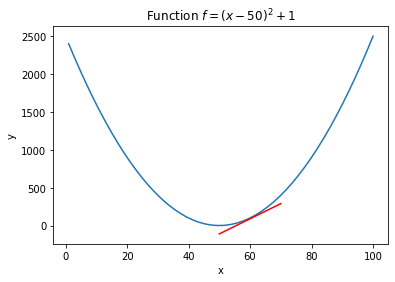

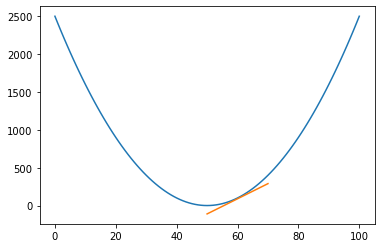

In [3]:
plt.plot(x, y)
plt.plot(der_x, der_y)

### Task 4. Find the minimum.

To find the minimum of the function $f$, we can divide the range into equal intervals and calculate the values. If the number of intervals tends to infinity, we can assume we have the correct answer. It can be easily noticed that such a method is inefficient in terms of performance. 

The derivative can be used to find a minimum of the function (a more generalized algorithm that uses partial derivatives is called Gradient descent and will be described later). In this task, we use the derivative of function $f$ with respect to variable $x$ to find the $x$ value in the next iteration. The next value for parameter $x$ can be calculated using the below formula:

$$x' = x - \alpha \frac{d}{dx}f(x)$$,

where symbol $\alpha$ is the **learning rate**. A learning rate is a small number that determines the step size at each iteration. Too small $\alpha$ causes the steps very small, increasing the number of iterations to be done before achieving the minimum. Too big $\alpha$ may cause the algorithm not to reach the minimum at all.

<table style="margin: auto;">
    <thead><tr><th style="text-align:center;">(a) Proper $\alpha$ value</th><th style="text-align:center;">(b) $\alpha$ is too large</th></tr></thead><tbody>
    <tr><td>
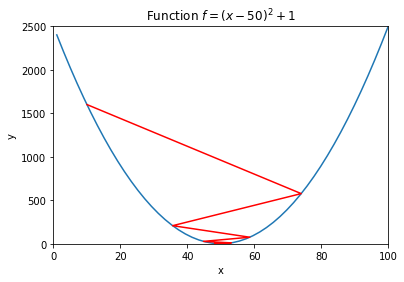
    </td><td>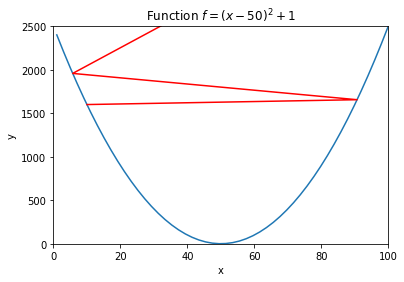</td></tr></tbody></table>

The above operation should be repeated until the function converges (the value change between steps is near 0). You can arbitrary assume some number of iterations (called epochs), for example between 10 and 100.
        
*NOTE: if you get large numbers growing to infinite, it means that your learning rate is too high*

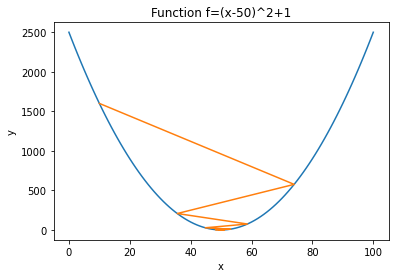

In [4]:
# Learning rate
starting_point = 10
total_points = []
min_y = []
y_val = []
def min(starting_point):
    a = 0.8
    return starting_point - a*derv(starting_point)

for i in range(50):
    min_y.append(min(starting_point))
    total_points.append(starting_point)
    y_val.append(fun(starting_point))
    starting_point = min_y[i]
    i += 1

plt.title("Function f=(x-50)^2+1")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.plot(total_points, y_val)

### Task 5. Partial derivatives.

The partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant ([wikipedia](https://en.wikipedia.org/wiki/Partial_derivative)). The partial derivative of function $f$ with respect to variable $x$ is defined as follows: $ \frac{\partial f}{\partial x} $. 
Partial derivatives are useful if there is more than one variable in the formula. In this case, all the partial derivatives of function form the gradient, which can be defined as below:
$$
\nabla = \bigg{\lgroup}\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1},  \cdots, \frac{\partial f}{\partial x_{n-1}}\bigg{\rgroup}
$$

Your task is to implement the below function $f$ and calculate the gradient $\nabla$ (all partial derivatives of the function):

$$f(x, y) = \frac{x^4 - 4x^3 + 10 + \frac{1}{2}y^4}{4}$$

In [5]:
# f(x,y) = 1/4*x^4 - x^3 + 2,5 + 1/8*y^4
def function(x, y):
    return (x**4-4*x**3+10+0.5*y**4)/4

def grad(x, y):
    return (x**3-3*x**2, 0.5*y**3)


### Task 6. Gradient descent (multiple variables).
The same way you calculated the minimum of the univariate function using the derivative, you can find the minimum of the multivariate function using the gradient. The algorithm is called Gradient Descent, and the next steps for the algorithm can be defined as follows:

$$
x' = x - \alpha\nabla_x f(x)
$$


Implement the Gradient Descent algorithm that minimizes the function $f$ implemented in previous tasks, save the history output of $f$ and present it on chart in function of number of steps (epochs).

**Example output:**

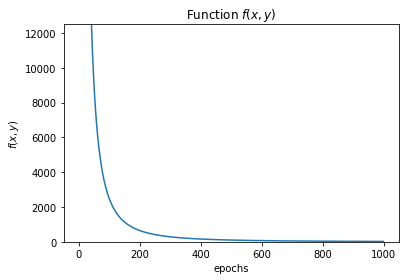


[//]: # (
Repeat until convergence:
$$x_0 = \alpha\frac{\partial f}{\partial x_0}f(x)$$
$$x_1 = \alpha\frac{\partial f}{\partial x_1}f(x)$$
$$\cdots$$
$$x_{n-1} = \alpha\frac{\partial f}{\partial x_{n-1}}f(x)$$
)

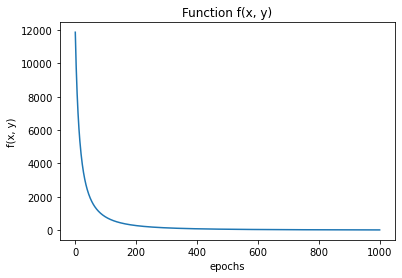

In [6]:
a = 0.0001
def derivative_x(x):
    return x**3-3*x**2

def derivative_y(y):
    return 0.5*y**3

def min_x(x):
    return x - a*derivative_x(x)

def min_y(y):
    return y - a*derivative_y(y)

epochs = 1000
def step(x, y):
    following_steps = []
    for i in range(epochs):
        following_steps.append((x , y))
        x = min_x(x)
        y = min_y(y)
    return following_steps

st = step(15,12)
function_output = []
for i in range(epochs):
    x = st[i][0]
    y = st[i][1]
    function_output.append(function(x,y))

plt.title("Function f(x, y)")
plt.xlabel("epochs")
plt.ylabel("f(x, y)")
plt.plot(range(epochs), function_output)